Mean Absolute Error: 0.568491194952019
R^2 Score: 0.9802685665734866


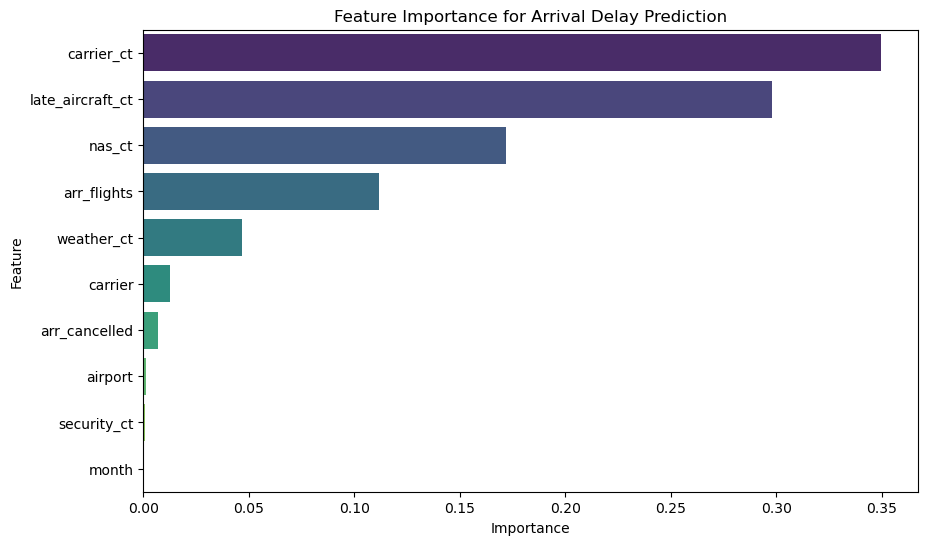

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill any missing values with zero
df.fillna(0, inplace=True)

# Define features (X) and target (y)
features = ['month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled',
            'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = df[features]
y = df['arr_delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("R^2 Score:", r2_score(y_test, y_pred_gb))

# Visualizations
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gb_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance for Arrival Delay Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


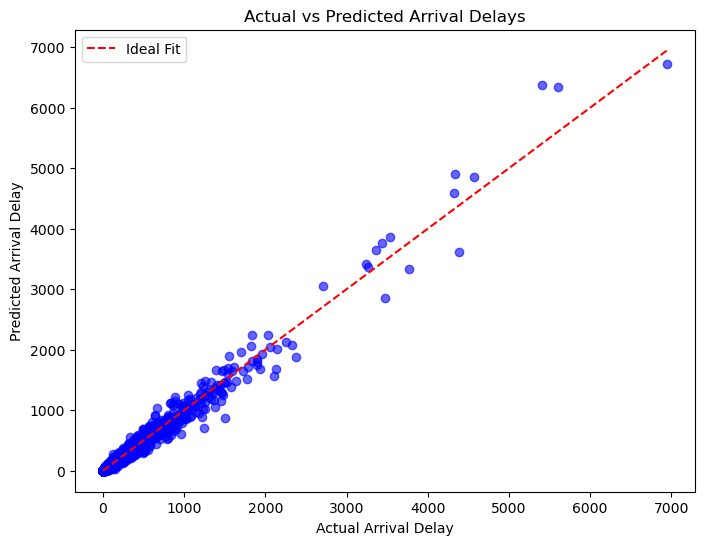

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title("Actual vs Predicted Arrival Delays")
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.legend()
plt.show()


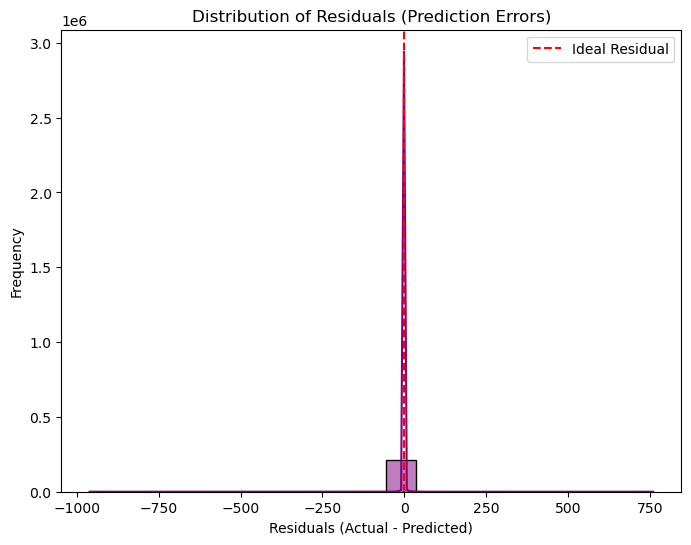

In [3]:
residuals = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--', label='Ideal Residual')
plt.legend()
plt.show()


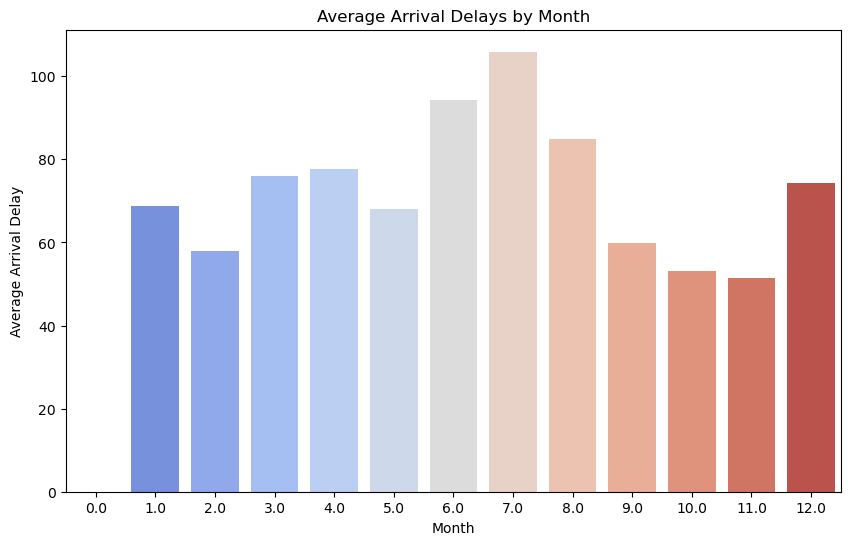

In [4]:
# Calculate average delays by month
monthly_delays = df.groupby('month')['arr_delay'].mean().reset_index()

# Plot delays by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='arr_delay', data=monthly_delays, palette='coolwarm')
plt.title("Average Arrival Delays by Month")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay")
plt.show()


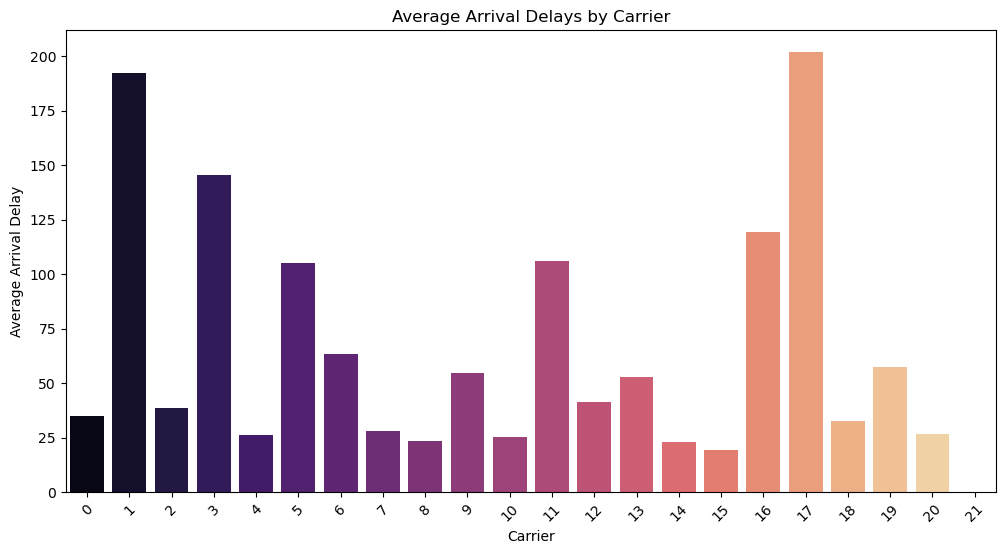

In [5]:
# Calculate average delays by carrier
carrier_delays = df.groupby('carrier')['arr_delay'].mean().reset_index()

# Plot delays by carrier
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier', y='arr_delay', data=carrier_delays, palette='magma')
plt.title("Average Arrival Delays by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.xticks(rotation=45)
plt.show()


Carrier Number to Name Mapping:
0: ABE
1: ABI
2: ABQ
3: ABR
4: ABY
5: ACK
6: ACT
7: ACV
8: ACY
9: ADK
10: ADQ
11: AEX
12: AGS
13: AKN
14: ALB
15: ALO
16: ALS
17: ALW
18: AMA
19: ANC
20: APN
21: ART
22: ASE
23: ATL
24: ATW
25: ATY
26: AUS
27: AVL
28: AVP
29: AZA
30: AZO
31: BDL
32: BET
33: BFF
34: BFL
35: BGM
36: BGR
37: BHM
38: BIH
39: BIL
40: BIS
41: BJI
42: BKG
43: BLI
44: BLV
45: BMI
46: BNA
47: BOI
48: BOS
49: BPT
50: BQK
51: BQN
52: BRD
53: BRO
54: BRW
55: BTM
56: BTR
57: BTV
58: BUF
59: BUR
60: BWI
61: BZN
62: CAE
63: CAK
64: CDC
65: CDV
66: CGI
67: CHA
68: CHO
69: CHS
70: CID
71: CIU
72: CKB
73: CLE
74: CLL
75: CLT
76: CMH
77: CMI
78: CMX
79: CNY
80: COD
81: COS
82: COU
83: CPR
84: CRP
85: CRW
86: CSG
87: CVG
88: CWA
89: CYS
90: DAB
91: DAL
92: DAY
93: DBQ
94: DCA
95: DDC
96: DEC
97: DEN
98: DFW
99: DHN
100: DIK
101: DLG
102: DLH
103: DRO
104: DRT
105: DSM
106: DTW
107: DVL
108: EAR
109: EAT
110: EAU
111: ECP
112: EGE
113: EKO
114: ELM
115: ELP
116: ERI
117: ESC
118: EUG
119: EV

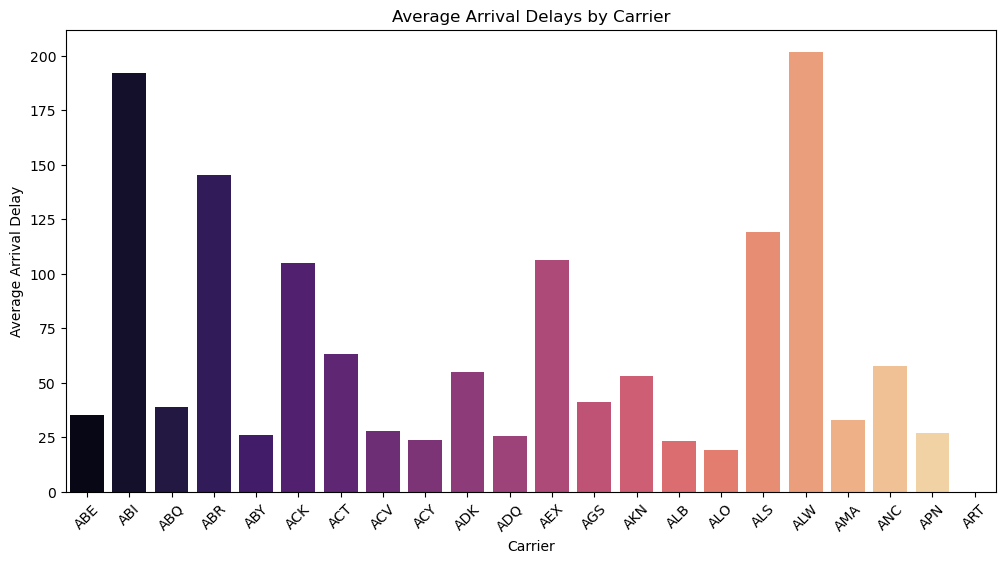

In [7]:
# Display the mapping from numbers to original carrier names
carrier_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
reverse_carrier_mapping = {v: k for k, v in carrier_mapping.items()}  # Reverse mapping

# Print the mapping
print("Carrier Number to Name Mapping:")
for carrier_num, carrier_name in reverse_carrier_mapping.items():
    print(f"{carrier_num}: {carrier_name}")

# Decode the carrier numbers back to their original names
df['carrier_name'] = df['carrier'].map(reverse_carrier_mapping)

# Group by carrier name and calculate average delays
carrier_delays = df.groupby('carrier_name')['arr_delay'].mean().reset_index()

# Plot delays by carrier
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier_name', y='arr_delay', data=carrier_delays, palette='magma')
plt.title("Average Arrival Delays by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.xticks(rotation=45)
plt.show()
